In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


In [2]:
age = pd.read_csv('/cellar/users/ramarty/Data/kir/TCGA/clinical_df.csv', index_col=0)

In [3]:
age = pd.DataFrame(age[age['age_at_diagnosis'] != -1]['age_at_diagnosis'])
age.columns = ['age']

In [4]:
age.head()

,age
TCGA-02-0001,44
TCGA-02-0003,50
TCGA-02-0004,59
TCGA-02-0006,56
TCGA-02-0007,40


In [5]:
age.to_csv('/cellar/users/ramarty/Data/hla_ii/clinical/age_at_diagnosis.csv')

In [76]:
tissue_df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_tissues.csv', index_col=0)

In [29]:
classI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_i.csv', index_col=0)
classII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/combined_classes/patient_affinities.class_ii.csv', index_col=0)

In [55]:
both = pd.concat([classI.transpose(), classII.transpose()]).transpose()

In [56]:
both.head()

,BRAF_V600E,IDH1_R132H,PIK3CA_E545K,PIK3CA_H1047R,KRAS_G12D,KRAS_G12V,PIK3CA_E542K,NRAS_Q61R,KRAS_G12C,KRAS_G13D,...,NOTCH1_ifd_136518618,PIK3R1_ifd_68295304,CTNNB1_ifd_41224643,PIK3R1_ifd_68293795,ERBB2_ifi_39724728,EGFR_ifd_55174773,TP53_ifd_7675066,BRAF_ifd_140778037,MAP2K1_ifd_66436756,EGFR_ifd_55173986
TCGA-DH-A7UV,3.121455,2.669782,5.410144,11.670615,3.346380,1.290563,0.539980,3.974573,2.072653,3.591180,...,46.202687,9.085546,5.809353,57.436539,3.452314,37.369338,43.059937,13.691331,0.178858,6.156737
TCGA-DH-A7UT,1.622589,2.809934,3.745498,2.066738,4.247754,1.281134,0.462080,3.863594,1.820371,4.252850,...,57.903340,1.324529,32.240555,52.756904,7.135842,33.804516,59.712589,18.867511,0.310054,9.214424
TCGA-DH-A7UU,13.035144,2.321219,17.158570,2.170015,4.568261,1.735469,4.656085,3.837563,3.540984,4.615385,...,68.136439,10.303556,46.047521,59.433962,6.094775,41.650485,65.500945,19.980695,0.309334,8.973531
TCGA-DH-A7UR,2.976900,5.283770,4.060954,2.679426,4.090909,1.976503,1.943233,4.855731,2.344840,4.117179,...,55.363392,10.166434,12.154159,55.965864,5.167660,37.453895,58.518331,9.380651,0.589522,8.543909
TCGA-DH-A7US,9.973523,11.408972,1.452903,5.688817,3.128834,2.941618,3.043294,3.342175,4.207577,3.456418,...,53.700057,8.331330,17.175878,52.326696,3.543450,32.481866,69.785382,17.165383,3.293425,7.841840


In [68]:
# machine learning
from sklearn import tree
from random import shuffle

In [58]:
patients = [x for x in age.index if x in both.index]
len(patients)

6291

In [60]:
X = both.ix[patients].as_matrix()
Y = age.ix[patients]

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [64]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)

In [71]:
Y_predicted = clf.predict(X_test)

In [73]:
sp.spearmanr(Y_predicted, Y_test)

SpearmanrResult(correlation=0.0066144925088352756, pvalue=0.76320749511038377)

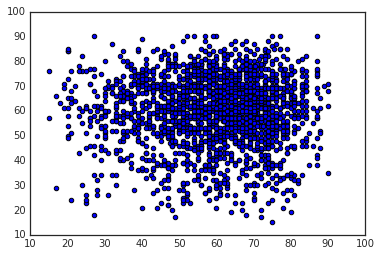

In [74]:
plt.scatter(Y_predicted, Y_test)

In [75]:
shuffle(Y_predicted)
sp.spearmanr(Y_predicted, Y_test)

SpearmanrResult(correlation=-0.0050250315565386261, pvalue=0.81896611139512054)

In [84]:
tissue_df.Tissue.value_counts()[:10]

BRCA    897
LUAD    565
LGG     506
HNSC    503
PRAD    492
LUSC    487
THCA    484
SKCM    467
STAD    435
BLCA    409
Name: Tissue, dtype: int64

In [92]:
for tissue in tissue_df.Tissue.value_counts().index[:10]:
    patients = [x for x in age.index if (x in both.index)&(x in tissue_df[tissue_df.Tissue == tissue].index)]
    X = both.ix[patients].as_matrix()
    Y = age.ix[patients]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=41)
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X_train, Y_train)
    Y_predicted = clf.predict(X_test)
    print tissue, sp.spearmanr(Y_predicted, Y_test)
    shuffle(Y_predicted)
    print "randomized", sp.spearmanr(Y_predicted, Y_test)

BRCA SpearmanrResult(correlation=0.012446819068737373, pvalue=0.91330513468350238)
randomized SpearmanrResult(correlation=-0.085335684114751814, pvalue=0.45460729481665874)
LUAD SpearmanrResult(correlation=0.0080450446599943642, pvalue=0.9213786728170742)
randomized SpearmanrResult(correlation=-0.053809313939098539, pvalue=0.50886569130856629)
LGG SpearmanrResult(correlation=0.12013469987420357, pvalue=0.13909745407769744)
randomized SpearmanrResult(correlation=-0.20591022153911442, pvalue=0.010664453463866894)
HNSC SpearmanrResult(correlation=-0.017026434216170987, pvalue=0.83237922125416286)
randomized SpearmanrResult(correlation=-0.00094155754293209065, pvalue=0.99066224468507613)
PRAD SpearmanrResult(correlation=-0.018465163394342309, pvalue=0.82195019683144988)
randomized SpearmanrResult(correlation=-0.15811440645662739, pvalue=0.052499871355419683)
LUSC SpearmanrResult(correlation=0.017612786776686234, pvalue=0.84357205786702116)
randomized SpearmanrResult(correlation=0.052750862

In [91]:
tissue = 'BRCA'
patients = [x for x in age.index if (x in both.index)&(x in tissue_df[tissue_df.Tissue == tissue].index)]
X = both.ix[patients].as_matrix()
Y = age.ix[patients]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)
Y_predicted = clf.predict(X_test)
print tissue, sp.spearmanr(Y_predicted, Y_test)

BRCA SpearmanrResult(correlation=-0.25736557896520584, pvalue=0.022034528839905022)


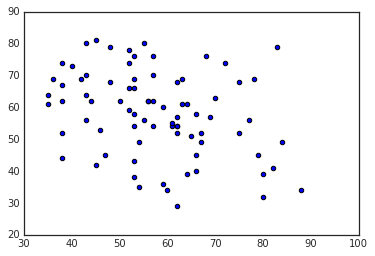

In [87]:
plt.scatter(Y_predicted, Y_test)